## 럭키백에서 원하는 생선이 들어있을 확률 문제를 구하자 K-최근접이웃##

In [1]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()
# diagonal대각선

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
pd.unique(fish['Species'])#생선 종류 확인, 타깃데이터

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()#species제외 나머지 입력 데이터로 정하기

In [4]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [5]:
fish_target = fish['Species'].to_numpy()
fish_target
# 모델 학습 시키기 위해서는 데이터프레임, 리스트와 비슷하지만 고차원의 큰 배열을 효과적으로 다룰 수 있음

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [6]:
# 훈련데이터, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [7]:
# 훈련데이터, 테스트 데이터 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
# k-최근접 이웃 분류기 확률 예측

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [9]:
kn.score(train_scaled, train_target)

0.8907563025210085

In [10]:
kn.score(test_scaled, test_target)

0.85

In [11]:
kn.classes_#타깃값 그대로 사이킷런 모델에 전달하면 순서가 알파벳으로 됨, 원래 순서와 다름

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [12]:
#처음 5개 샘플 타깃값 예측하기
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [13]:
#5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까?
import numpy as np
proba = kn.predict_proba(test_scaled[:5])#첫번째 열이 Bream에 대한 확률, 두번째 열이 Parkki에 대한 확률
np.round(proba, decimals=4)#소수점 네 번째 자리까지 표기합니다. 다섯 번째 자리에서 반올림합니다. 

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [14]:
#   [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
# 4번째 행 샘플의 최근접 이웃의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]
# 3번째 열인 perch가 0.6667일 확률이므로 3분의 2, 5번째 Roach일 확률이 3분의 1

array([['Roach', 'Perch', 'Perch']], dtype=object)

In [15]:
# 3개의 최근접 이웃 사용하므로 확률은 0, 0.33, 0.6667, 1이 전부

In [16]:
# 더 좋은 방법은?

## 로지스틱 회귀분석 ##

In [17]:
# 확률이 되려면 0~1과 0~100%사이 값이 되어야 함
# 시그모이드 함수 사용

In [18]:
import numpy as np

In [19]:
import matplotlib.pyplot as plt

In [20]:
z = np.arange(-5, 5, 0.1)#배열 z 생성

In [21]:
phi = 1 / (1 + np.exp(-z))#시그모이드 함수

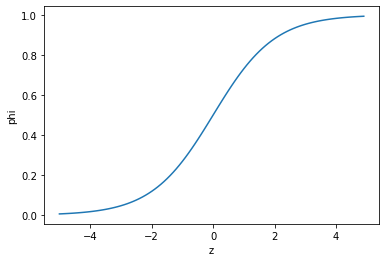

In [22]:
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

In [23]:
# 넘파이 배열 
# boolean indexing

char_arr = np.array(['A','B','C','D','E'])
char_arr[[True, False, True, False, False]]

array(['A', 'C'], dtype='<U1')

In [24]:
# 도미(Bream)와 빙어(Smelt)의 행만 골라내기

bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')#도미, 빙어인 경우

In [25]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [26]:
# 도미와 빙어데이터만 골라내기 

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [27]:
# 로지스틱 회귀모델 훈련
from sklearn.linear_model import LogisticRegression
Ir = LogisticRegression()

In [28]:
Ir.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# 처음 5개 샘플 예측하기
Ir.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [30]:
# 5개 샘플의 예측 확률
Ir.predict_proba(train_bream_smelt[:5])
# 2개의 확률, 1번째 확률이 음성클래스, 2번째 확률이 양성 클래스
# 2번째 샘플만 양성 클래스인 빙어의 확률이 높음

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [31]:
Ir.classes_#0이 도미, 1이 빙어

array(['Bream', 'Smelt'], dtype=object)

In [32]:
# 로지스틱 회귀가 학습한 계수 확인
Ir.coef_, Ir.intercept_

(array([[-0.4037798 , -0.57620209, -0.66280298, -1.01290277, -0.73168947]]),
 array([-2.16155132]))

In [34]:
# 방정식
# z = -0.404x(Weight) - 0.576x(Length) - 0.663 x(Diagonal) -1.013 x(Height)-0.732 x(Width)-2.161
# 로지스틱 회귀는 선형회귀와 비슷, z값을 출력할 수 있음

In [35]:
# 처음 5개 샘플의 z값 출력
# z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음
decisions = Ir.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [36]:
# scipy라이브러리에도 시그모이드 함수가 있음, expit()은 np.exp()함수를 사용해 분수 계산을 하는 것보다 훨씬 편리하고 안전
from scipy.special import expit
expit(decisions)

array([0.00240145, 0.97264817, 0.00513928, 0.01415798, 0.00232731])

In [37]:
# 출력된 값은 predict_proba()메서드 출력의 두번째 열값과 동일, 양성 클래스에 대한 z값 반환
# 이진분류의 경우 predict_proba()는 음성클래스와 양성클래스 확률 출력

## 로지스틱 회귀로 다중 분류 수행하기

In [ ]:
# 7개의 생선을 분류해보면서 이진 분류와의 차이점 알아보기